In [53]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

data = pd.read_csv("Data/weather_station_data_updated.csv")
data["time"] = pd.to_datetime(data["time"])

columns_to_average = ["tavg", "tmin", "tmax", "prcp", "wspd", "pres", "elevation"]

distance_threshold = 240  # Roughly 100 miles
EARTH_RADIUS_KM = 6378.0

data['latitude_rad'] = np.radians(data['latitude'])
data['longitude_rad'] = np.radians(data['longitude'])

nn = NearestNeighbors(metric='haversine')
nn.fit(data[["latitude_rad", "longitude_rad"]])

for index in range(len(data)):
    if index%1000 == 0:
        print(f"Working with index: {index}")



    row = data.iloc[index]
    month_data = data[(data["time"].dt.month == row["time"].month) & (data["time"].dt.year == row["time"].year)].drop(index)

    if month_data.empty:
        #print(f"Skipping index {index} due to no matching month data.")
        continue

    nn.fit(month_data[["latitude_rad", "longitude_rad"]])

    query_point = pd.DataFrame(
        [[row["latitude_rad"], row["longitude_rad"]]], 
        columns=["latitude_rad", "longitude_rad"]
    )
    distances, indices = nn.kneighbors(
        query_point,
        n_neighbors=min(50, len(month_data)),
        return_distance=True
    )

    distances_km = distances.flatten() * EARTH_RADIUS_KM

    if np.max(distances_km) > distance_threshold:
        #print(f"Skipping averages for index {index} due to distance exceeding threshold.")
        averages = {col: np.nan for col in columns_to_average}
    else:
        neighbor_indices = indices.flatten()
        neighbors = month_data.iloc[neighbor_indices]

        averages = {
            col: round(neighbors[col].dropna().head(3).mean(), 2) if len(neighbors[col].dropna()) >= 3 else np.nan
            for col in columns_to_average
        }

    for col in columns_to_average:
        if pd.isna(row[col]):
            data.at[index, col] = averages[col]

    #print(f"Averages for row {index}:", averages)

updated_data = data.copy()
updated_data.to_csv("Data/updated_weather_station_data.csv", index=False)


Working with index: 0
Working with index: 1000
Working with index: 2000
Working with index: 3000
Working with index: 4000
Working with index: 5000
Working with index: 6000
Working with index: 7000
Working with index: 8000
Working with index: 9000
Working with index: 10000
Working with index: 11000
Working with index: 12000
Working with index: 13000
Working with index: 14000
Working with index: 15000
Working with index: 16000
Working with index: 17000
Working with index: 18000
Working with index: 19000
Working with index: 20000
Working with index: 21000
Working with index: 22000
Working with index: 23000
Working with index: 24000
Working with index: 25000
Working with index: 26000
Working with index: 27000
Working with index: 28000
Working with index: 29000
Working with index: 30000
Working with index: 31000
Working with index: 32000
Working with index: 33000
Working with index: 34000
Working with index: 35000
Working with index: 36000
Working with index: 37000
Working with index: 38000

In [54]:
import csv
t1 = open('Data/updated_weather_station_data_filled_values.csv', 'r')
t2 = open('Data/updated_weather_station_data.csv', 'r')
fileone = t1.readlines()
filetwo = t2.readlines()
t1.close()
t2.close()

outFile = open('update.csv', 'w')
x = 0
for i in fileone:
    if i != filetwo[x]:
        outFile.write(filetwo[x])
    x += 1
outFile.close()

In [58]:
t1 = pd.read_csv("Data/updated_weather_station_data_filled_values.csv")
t2 = pd.read_csv("Data/updated_weather_station_data.csv")
print("Filled_values:")
print(t1.isna().sum())
print("updated")
print(t2.isna().sum())

Filled_values:
tavg              17691
tmin              15645
tmax              15700
prcp              26078
wspd              26163
pres             102941
tsun             450909
latitude              0
longitude             0
elevation             0
state                35
time                  0
latitude_rad          0
longitude_rad         0
dtype: int64
updated
tavg              17691
tmin              15645
tmax              15700
prcp              26078
wspd              26251
pres             102926
tsun             450909
latitude              0
longitude             0
elevation             0
state                35
time                  0
latitude_rad          0
longitude_rad         0
dtype: int64


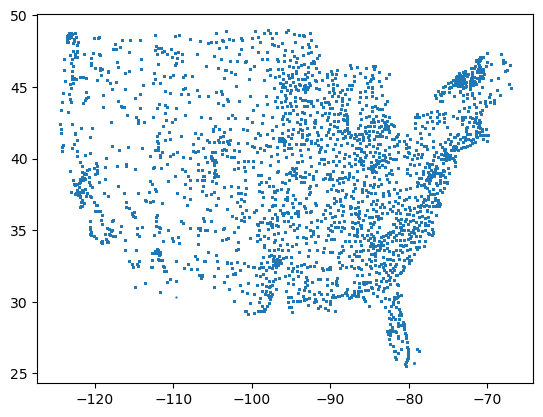

(453138, 14)
(350197, 14)


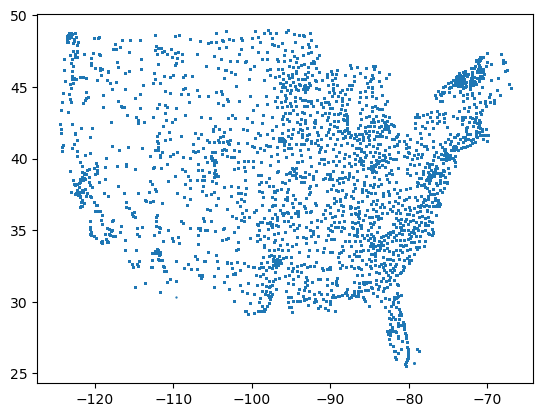

In [ ]:
import matplotlib.pyplot as plt
data = pd.read_csv("Data/updated_weather_station_data_filled_values.csv")
plt.scatter(data["longitude"],data["latitude"],s=0.4)
plt.show()
print(data.shape)
data = data.dropna(subset = ["pres"])
plt.scatter(data["longitude"],data["latitude"],s=0.4)
print(data.shape)
plt.show()



In [85]:
data = pd.read_csv("Data/updated_weather_station_data_filled_values.csv")
data = data.dropna(subset = ["pres"])
data = data.drop(["latitude_rad","longitude_rad","state","tsun"],axis = 1)
data = data.dropna()
data.to_csv("Data/complete_data.csv",index= False)

tavg         0
tmin         0
tmax         0
prcp         0
wspd         0
pres         0
latitude     0
longitude    0
elevation    0
time         0
month        0
dtype: int64


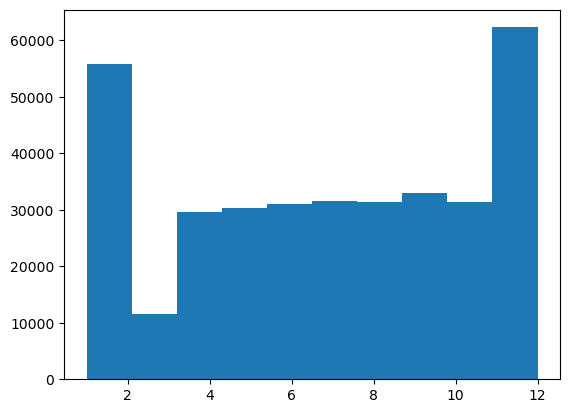

In [88]:
data = pd.read_csv("Data/complete_data.csv")
data["time"] = pd.to_datetime(data["time"])
data["month"] = data["time"].dt.month
plt.hist(data["month"])
print(data.isna().sum())